In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np

In [3]:
# Set the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

# Set the hyperparameters
batch_size = 32
num_epochs = 50
learning_rate = 0.0002
betas = (0.5, 0.999)

Using device:  cpu


In [5]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_data = datasets.ImageFolder(root=".", transform=transform)
loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)

In [6]:
image =next(iter(train_data)) # values -1 to 1

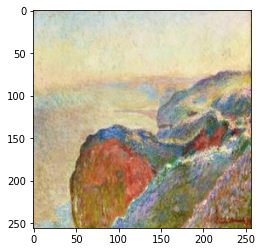

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Norm_image = image[0]/2 + 0.5 # normalize it back 0 to 1
Norm_image = np.transpose(Norm_image, (1, 2, 0)) # (H, W, channels = 3)
plt.imshow(Norm_image)
plt.show()


In [23]:
from models import Generator, Discriminator, initialize_weights

LEARNING_RATE = 2e-4
IMAGE_SIZE = 256
CHANNELS_IMG = 3
Z_DIM = 100
NUM_EPOCHS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64

gen = Generator(Z_DIM, CHANNELS_IMG, FEATURES_GEN).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_GEN).to(device)
initialize_weights(gen)
initialize_weights(disc)

opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=betas)
opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=betas)
criterion = nn.BCELoss()

In [13]:
torch.autograd.set_detect_anomaly(True)

In [25]:
for epoch in range(NUM_EPOCHS):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.to(device)
        noise = torch.randn((batch_size, Z_DIM, 1, 1)).to(device)
        fake = gen(noise)

        
        #training disc
        disc_real = disc(real).reshape(-1)
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake).reshape(-1)
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        loss_disc = (loss_disc_fake + loss_disc_real)/2
        disc.zero_grad()
        loss_disc.backward(retain_graph=True)
        opt_disc.step()

        # training gen
        output = disc(fake).reshape(-1)
        loss_gen = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

        print(f"Epoch [{epoch}/{NUM_EPOCHS}] Batch [{batch_idx}/{len(loader)}]\n")
        print(f"Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f}\n")

        

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\torch\autograd\__init__.py:200: UserWarning: Error detected in TanhBackward0. Traceback of forward call that caused the error:
  File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever(

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

tensor([[[[0.1510, 0.1513, 0.1456,  ..., 0.1511, 0.1454, 0.1484],
          [0.1366, 0.1407, 0.1365,  ..., 0.1408, 0.1365, 0.1393],
          [0.1483, 0.1470, 0.1394,  ..., 0.1469, 0.1398, 0.1442],
          ...,
          [0.1366, 0.1407, 0.1365,  ..., 0.1409, 0.1366, 0.1393],
          [0.1484, 0.1472, 0.1395,  ..., 0.1471, 0.1399, 0.1442],
          [0.1416, 0.1392, 0.1389,  ..., 0.1392, 0.1389, 0.1389]],

         [[0.0090, 0.0165, 0.0118,  ..., 0.0164, 0.0118, 0.0155],
          [0.0086, 0.0064, 0.0113,  ..., 0.0067, 0.0112, 0.0134],
          [0.0089, 0.0176, 0.0126,  ..., 0.0175, 0.0126, 0.0170],
          ...,
          [0.0086, 0.0064, 0.0112,  ..., 0.0067, 0.0112, 0.0134],
          [0.0089, 0.0176, 0.0126,  ..., 0.0175, 0.0126, 0.0170],
          [0.0123, 0.0063, 0.0119,  ..., 0.0062, 0.0118, 0.0139]],

         [[0.1023, 0.0981, 0.1009,  ..., 0.0983, 0.1009, 0.1050],
          [0.1019, 0.1012, 0.1027,  ..., 0.1012, 0.1028, 0.0949],
          [0.1031, 0.1071, 0.0972,  ..., 0

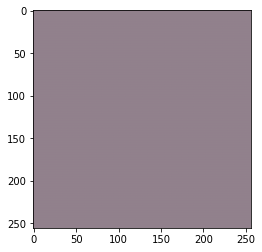

In [24]:
#sample

noise = torch.randn((1, Z_DIM, 1, 1)).to(device)
fake_img = gen(noise)

print(fake_img)
Norm_image = fake_img[0]/2 + 0.5 # normalize it back 0 to 1
Norm_image = np.transpose(Norm_image.detach().numpy(), (1, 2, 0)) # (H, W, channels = 3)
plt.imshow(Norm_image)
plt.show()

